<a href="https://colab.research.google.com/github/Wunzir/Projects-in-AI-ML/blob/main/hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

## Dataset Datasheet
### **1. Motivation**
This dataset was created to analyze the impact of modern digital habits such as smartphone usage, social media, gaming, and others, on student academic performance and lifestyle balance. The goal is to build a predictive model capable of identifying students who are struggling with productivity due to digital distractions, allowing for early intervention.
### **2. Target Definition**
The problem is inherently a **Binary Classification** task. We will convert the continuous variable productivity_socre into a binary target variable called `is_productive`.
- **1 (Productive):** The student has a high productivity score (Productivity Score > 50)
- **0 (Distracted):** The student is struggling with being productive (Productivity Score <= 50)
#### **Cost Analysis**
- **False Negative (High Cost):** The model predicts that a student is "Productive" (1), but they are actually distracted/struggling. This is a high cost because the student receives no support to manage their digital habits and their performance may suffer unnoticed.
- **False Positive (Low Cost):** The model predicts that a student is "Distracted" (0), but they are actually fine. This is a low cost because the consequence is simply that the student receives advice on time management they might not strictly need. This outcome isn't hurtful.
### **3. Data Source & License/Terms**
- **Source:** [Kaggle (Student Productivity & Digital Distraction Dataset)](https://www.kaggle.com/datasets/sehaj1104/student-productivity-and-digital-distraction-dataset)
- **Type:** Synthetic/Simulated data (Artificially generated to mirror real-world logic)
- **Generation Method:** This dataset was synthetically generated using Python (NumPy and Pandas) to simulate realistic student's lifestyle, academic behavior, and digital distraction patterns. The feature distributions were designed based on real-world research studies and common student productivity factors.
- **License:** CC0: Public Domain
- **Privacy:** Contains no Personally Identifiable Information (PII) as the records are simulated.
### **4. Brief Feature Dictionary**
Below are the primary features used for prediction (after cleaning and removing IDs):
|Feature Name|Data Type|Description|
|---|---|---|
|`study_hours_per_day`|Numerical|The most direct contributor to productivity.|
|`sleep_hours`|Numerical|Affects cognitive function and focus.|
|`phone_usage_hours`|Numerical|A key metric for digital distraction.|
|`social_media_hours`|Numerical|Specific subset of phone usage.|
|`youtube_hours`|Numerical|Specific video-based distraction.|
|`gaming_hours`|Numerical|High-engagement leisure time.|
|`breaks_per_day`|Numerical|Indicates pacing and time management.|
|`coffee_intake_mg`|Numerical|Can correlate with late nights and/or high focus.|
|`exercise_minutes`|Numerical|Physical health correlates with mental stamina.|
|`attendance_percentage`|Numerical|Shows commitment and consistency.|
|`stress_level`|Numerical|High stress can either cripple or fuel productivity.|
|`assignments_completed`|Numerical|A leading indicator of staying on track.|
|`age`|Numerical|Controls for maturity levels.
|`gender`|Categorical|Gender of sex. Encoded as binary (0/1).|
### **5. Known Limitations & Risks**
**Synthetic Nature & Bias:** The data might be *too clean*. It might miss the random or unexplainable behaviors of real students. It also misses some real-world issues like outside factors that may affect a student for a certain period of time.
### **6. Leakage-Risk Notes**
For this dataset, there are no direct leakages.

In [100]:
# Import statements for the necessary libraries
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [43]:
# Download latest version
path = kagglehub.dataset_download("sehaj1104/student-productivity-and-digital-distraction-dataset")

print("Path to dataset files:", path)
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

Using Colab cache for faster access to the 'student-productivity-and-digital-distraction-dataset' dataset.
Path to dataset files: /kaggle/input/student-productivity-and-digital-distraction-dataset


In [44]:
df = pd.read_csv(os.path.join(path, csv_files[0]))
df.head()

,student_id,age,gender,study_hours_per_day,sleep_hours,phone_usage_hours,social_media_hours,youtube_hours,gaming_hours,breaks_per_day,coffee_intake_mg,exercise_minutes,assignments_completed,attendance_percentage,stress_level,focus_score,final_grade,productivity_score
0,1,23,Female,4.35,3.63,3.38,2.73,1.83,5.26,6,347,111,2,57.21,10,57,81.87,33.78
1,2,20,Male,6.14,6.58,5.48,1.51,3.13,1.73,13,403,28,10,91.27,10,49,60.90,48.99
2,3,29,Female,4.98,3.26,4.83,3.63,0.18,4.71,1,419,102,8,63.14,2,38,86.22,36.60
3,4,27,Female,3.19,4.58,10.06,3.95,5.75,2.52,9,178,28,18,40.51,6,50,71.77,19.87
4,5,24,Male,7.67,6.21,3.02,1.59,5.46,5.65,8,436,105,7,45.53,6,41,90.13,52.90


In [45]:
# Data Size
print(df.shape)
# Amount of null values
df.isna().sum()

(20000, 18)


,0
student_id,0
age,0
gender,0
study_hours_per_day,0
sleep_hours,0
phone_usage_hours,0
social_media_hours,0
youtube_hours,0
gaming_hours,0
breaks_per_day,0


In [46]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             20000 non-null  int64  
 1   age                    20000 non-null  int64  
 2   gender                 20000 non-null  object 
 3   study_hours_per_day    20000 non-null  float64
 4   sleep_hours            20000 non-null  float64
 5   phone_usage_hours      20000 non-null  float64
 6   social_media_hours     20000 non-null  float64
 7   youtube_hours          20000 non-null  float64
 8   gaming_hours           20000 non-null  float64
 9   breaks_per_day         20000 non-null  int64  
 10  coffee_intake_mg       20000 non-null  int64  
 11  exercise_minutes       20000 non-null  int64  
 12  assignments_completed  20000 non-null  int64  
 13  attendance_percentage  20000 non-null  float64
 14  stress_level           20000 non-null  int64  
 15  fo

In [47]:
# Statistics of the dataset (numeric columns)
df.describe()

,student_id,age,study_hours_per_day,sleep_hours,phone_usage_hours,social_media_hours,youtube_hours,gaming_hours,breaks_per_day,coffee_intake_mg,exercise_minutes,assignments_completed,attendance_percentage,stress_level,focus_score,final_grade,productivity_score
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,23.00745,5.254562,6.517799,6.250479,4.003655,2.990177,2.988339,7.542400,249.654550,59.648050,9.494100,69.947435,5.478750,64.444350,70.266409,50.180419
std,5773.647028,3.75489,2.742876,2.029784,3.313082,2.305154,1.729815,1.732803,4.016231,143.711231,34.611751,5.801469,17.397431,2.866943,20.176114,17.282277,16.086666
min,1.000000,17.00000,0.500000,3.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,40.000000,1.000000,30.000000,40.000000,0.000000
25%,5000.750000,20.00000,2.900000,4.770000,3.380000,2.000000,1.487500,1.490000,4.000000,125.000000,30.000000,4.000000,54.810000,3.000000,47.000000,55.460000,38.700000
50%,10000.500000,23.00000,5.250000,6.510000,6.240000,4.010000,2.980000,2.970000,8.000000,249.000000,60.000000,9.000000,69.985000,5.000000,65.000000,70.315000,50.235000
75%,15000.250000,26.00000,7.640000,8.310000,9.102500,5.970000,4.480000,4.490000,11.000000,373.000000,90.000000,15.000000,85.050000,8.000000,82.000000,85.340000,61.782500
max,20000.000000,29.00000,10.000000,10.000000,12.000000,8.000000,6.000000,6.000000,14.000000,499.000000,119.000000,19.000000,100.000000,10.000000,99.000000,99.990000,100.000000


In [48]:
dp_count = df.duplicated().sum()
print(f"Number of duplicate rows: {dp_count}")

Number of duplicate rows: 0


In [49]:
# statistics of the dataset (categorical columns)
df.describe(include=['O'])

# count: amount of non-null row entries in a column
# unique: amount of unique categories
# top: most frequent category
# freq: amount of times the most frequent category appeared

,gender
count,20000
unique,3
top,Female
freq,9640


In [50]:
# Is the data imbalanced?
results = pd.cut(
    df['productivity_score'],
    bins=[0, 50, 100],
    labels=['Distracted', 'Productive']).value_counts(normalize=True)
print(results)

productivity_score
Productive    0.506275
Distracted    0.493725
Name: proportion, dtype: float64


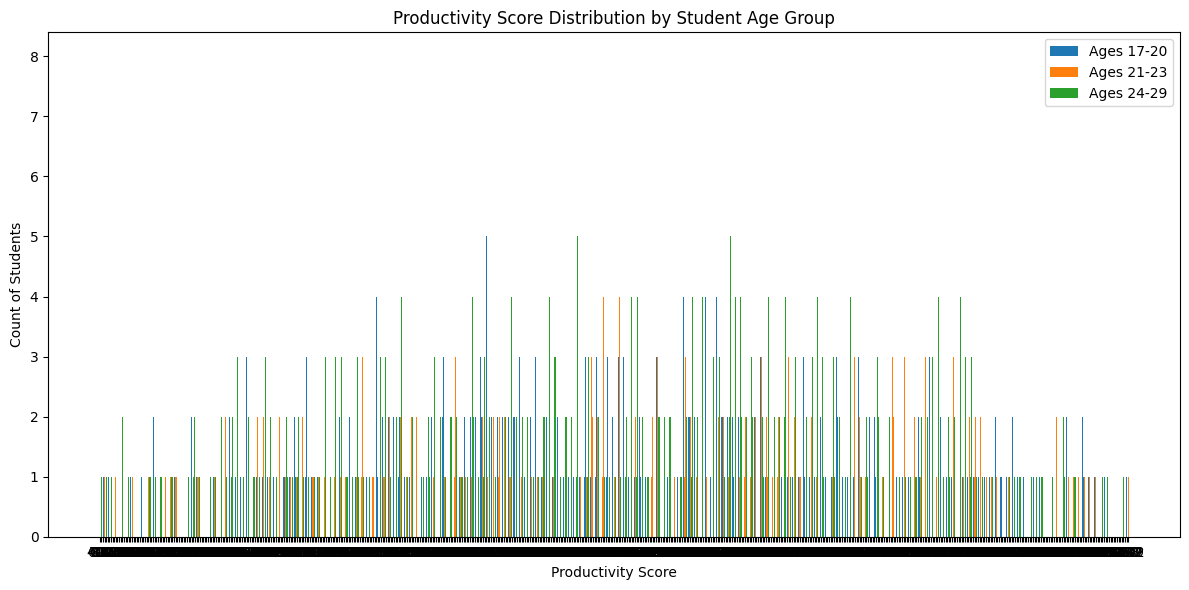

In [51]:
# 1. Define the unique scores to plot (Sorted 0-100)
labels = np.sort(df['productivity_score'].unique())

# 2. Define new Age Groups for the 17-29 range
# Group 1: 17-20 (Likely Freshmen/Sophomores)
young_mask = (df.age >= 17) & (df.age <= 20)
young_count = df[young_mask]['productivity_score'].value_counts().reindex(labels, fill_value=0)
# Group 2: 21-23 (Likely Juniors/Seniors)
mid_mask = (df.age >= 21) & (df.age <= 23)
mid_count = df[mid_mask]['productivity_score'].value_counts().reindex(labels, fill_value=0)
# Group 3: 24-29 (Likely Grad Students/Non-traditional)
older_mask = (df.age >= 24) & (df.age <= 29)
old_count = df[older_mask]['productivity_score'].value_counts().reindex(labels, fill_value=0)

# 3. Plotting
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, young_count, width, label='Ages 17-20')
rects2 = ax.bar(x, mid_count, width, label='Ages 21-23')
rects3 = ax.bar(x + width, old_count, width, label='Ages 24-29')

# Labels and Title
ax.set_ylabel('Count of Students')
ax.set_xlabel('Productivity Score')
ax.set_title('Productivity Score Distribution by Student Age Group')
ax.legend()

# 4. Clean up the x-axis ticks
# Show every 10th score so the axis isn't cluttered
if len(labels) > 20:
    ax.set_xticks(x[::10])
    ax.set_xticklabels(labels[::10])
else:
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

fig.tight_layout()
plt.show()

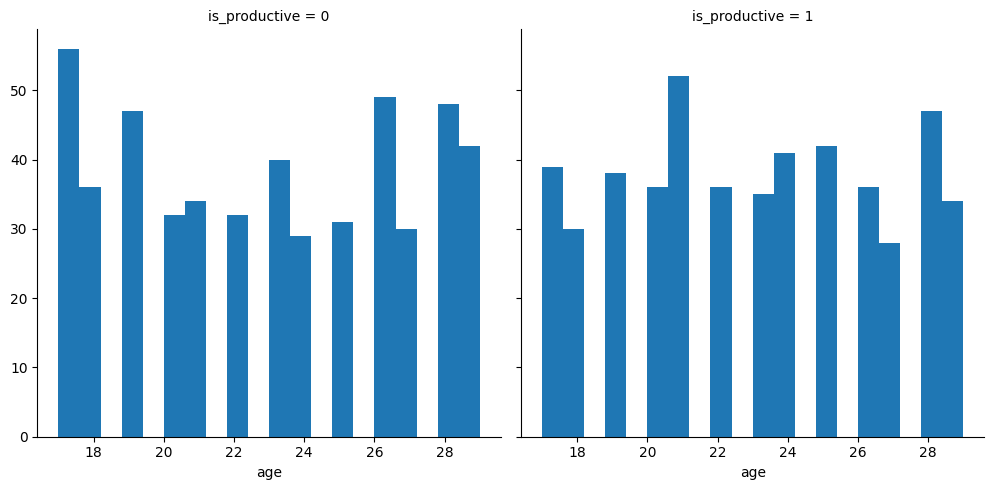

is_productive
1    10125
0     9875
Name: count, dtype: int64


In [52]:
# 1. Create the Classification Column
# We use 50 as the cutoff.
# Bins: -inf to 50 (Distracted/0), 50 to inf (Productive/1)
df['is_productive'] = pd.cut(df['productivity_score'],
                             bins=[-float('inf'), 50, float('inf')],
                             labels=[0, 1]).astype(int)

# 2. Visualize
# We map 'age' to see if older/younger students are more productive
# Using more than 100 rows (e.g., 1000) gives a better picture since you have 20k rows.
g = sns.FacetGrid(df[0:1000], col='is_productive', height=5)
g.map(plt.hist, 'age', bins=20)
g.add_legend()
plt.show()

# Optional: Check the balance
print(df['is_productive'].value_counts())

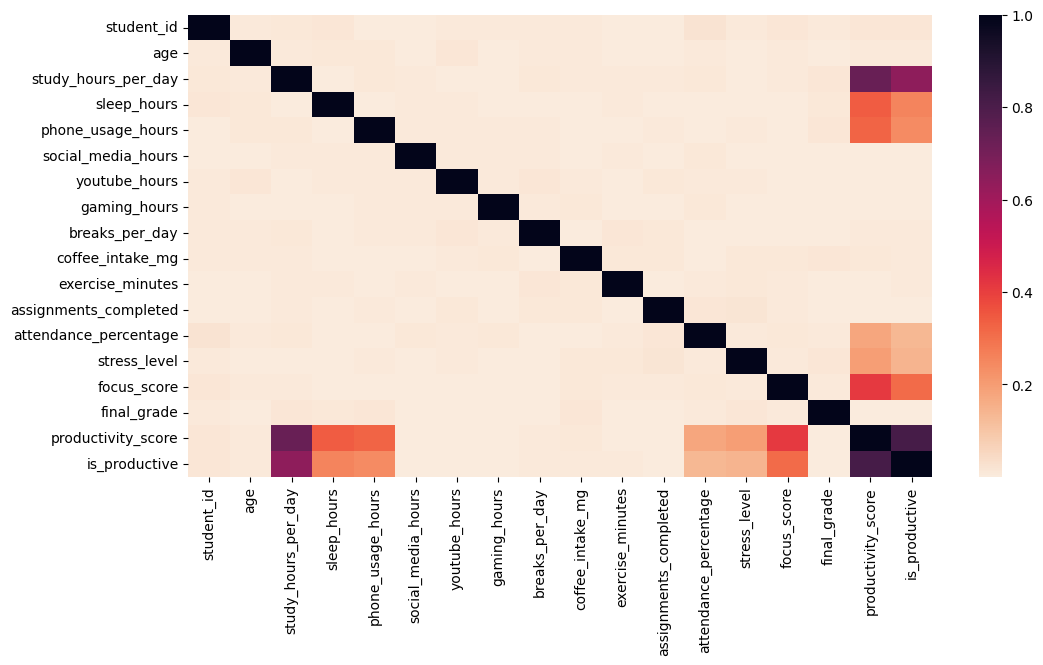

In [53]:
# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True).abs(), annot=False, cmap='rocket_r', ax=ax)
plt.show()

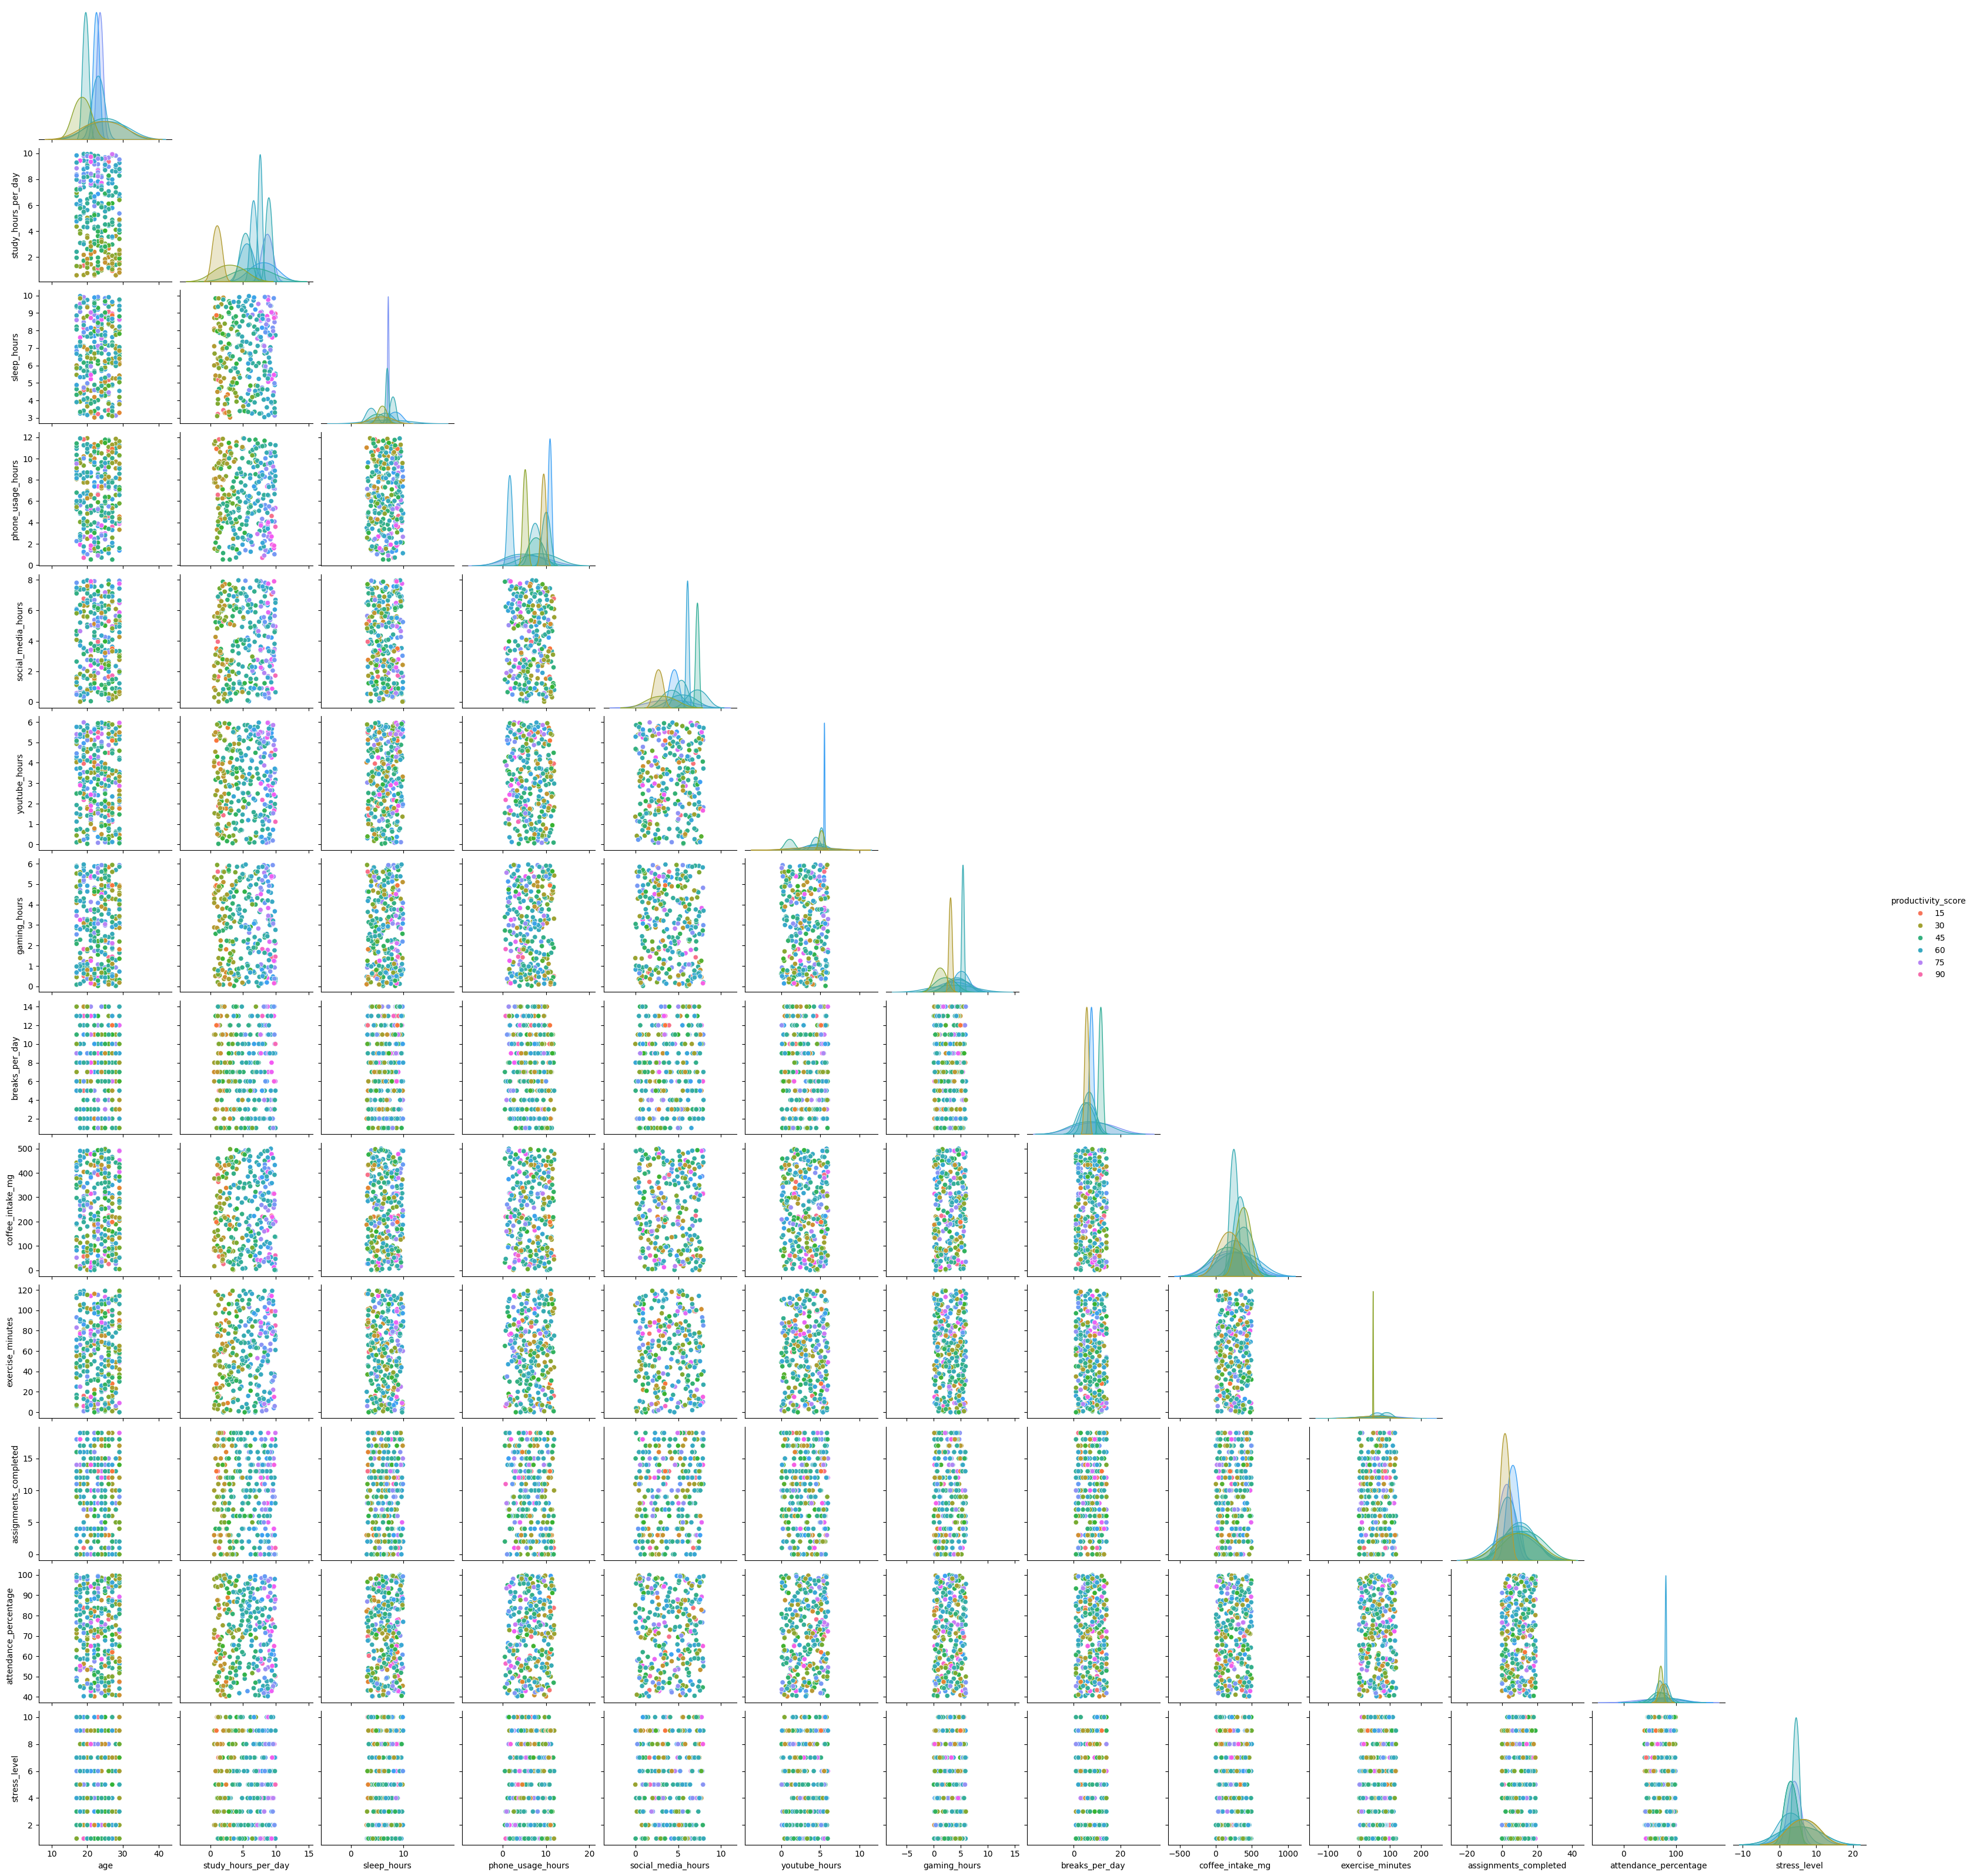

In [54]:
# Selecting the features we want to visualize
features = ["age", "study_hours_per_day", "sleep_hours", "phone_usage_hours",
            "social_media_hours", "youtube_hours", "gaming_hours",
            "breaks_per_day", "coffee_intake_mg", "exercise_minutes",
            "assignments_completed", "attendance_percentage", "stress_level",
            "productivity_score"]
# Creating the pairplot
# diag_kind='kde' creates the smooth density curves on the diagonal
# corner=True removes the redundant upper triangle of the matrix
sns.pairplot(df[features].sample(300), diag_kind='kde',
             hue="productivity_score", palette="husl", corner=True)
plt.show()

In [55]:
# feature correlation with target variable
df.corr(numeric_only=True)['productivity_score'].sort_values(ascending=False)

,productivity_score
productivity_score,1.000000
is_productive,0.816195
study_hours_per_day,0.732777
focus_score,0.411366
sleep_hours,0.340902
attendance_percentage,0.176107
student_id,0.012579
coffee_intake_mg,0.010190
exercise_minutes,0.002892
final_grade,0.001954


In [56]:
# Drop columns we decided to exclude. We exclude productivity_score since we
# already converted it into a binary label
df = df.drop(["student_id", "final_grade", "focus_score", "productivity_score"],
             axis=1, errors="ignore"
             )

# One-Hot Encode Gender
# drop_first=True removes the first column (e.g., keeps 'Gender_Male', drops 'Gender_Female')
df = pd.get_dummies(df, columns=['gender'], drop_first=False)

# Convert True/False to 1/0 (if get_dummies returned booleans)
# This ensures everything is numeric for the Neural Network
df = df.astype(float)

print("Final Data Shape:", df.shape)
df.head()

Final Data Shape: (20000, 17)


,age,study_hours_per_day,sleep_hours,phone_usage_hours,social_media_hours,youtube_hours,gaming_hours,breaks_per_day,coffee_intake_mg,exercise_minutes,assignments_completed,attendance_percentage,stress_level,is_productive,gender_Female,gender_Male,gender_Other
0,23.0,4.35,3.63,3.38,2.73,1.83,5.26,6.0,347.0,111.0,2.0,57.21,10.0,0.0,1.0,0.0,0.0
1,20.0,6.14,6.58,5.48,1.51,3.13,1.73,13.0,403.0,28.0,10.0,91.27,10.0,0.0,0.0,1.0,0.0
2,29.0,4.98,3.26,4.83,3.63,0.18,4.71,1.0,419.0,102.0,8.0,63.14,2.0,0.0,1.0,0.0,0.0
3,27.0,3.19,4.58,10.06,3.95,5.75,2.52,9.0,178.0,28.0,18.0,40.51,6.0,0.0,1.0,0.0,0.0
4,24.0,7.67,6.21,3.02,1.59,5.46,5.65,8.0,436.0,105.0,7.0,45.53,6.0,1.0,0.0,1.0,0.0


In [59]:
# 1. List of columns to normalize
# We explicitly list them to avoid messing up the Gender or Target columns
cols_to_norm = [
    'age', 'study_hours_per_day', 'sleep_hours', 'phone_usage_hours',
    'social_media_hours', 'youtube_hours', 'gaming_hours', 'breaks_per_day',
    'coffee_intake_mg', 'exercise_minutes', 'assignments_completed',
    'attendance_percentage', 'stress_level',
]

# 2. Apply Min-Max Normalization
# (Value - Min) / (Max - Min)
df[cols_to_norm] = (df[cols_to_norm] - df[cols_to_norm].min()) / (df[cols_to_norm].max() - df[cols_to_norm].min())

# 3. Verify
print("Normalization Check (Should be min=0.0, max=1.0):")
print(df[cols_to_norm].describe().loc[['min', 'max']])

Normalization Check (Should be min=0.0, max=1.0):
     age  study_hours_per_day  sleep_hours  phone_usage_hours  \
min  0.0                  0.0          0.0                0.0   
max  1.0                  1.0          1.0                1.0   

     social_media_hours  youtube_hours  gaming_hours  breaks_per_day  \
min                 0.0            0.0           0.0             0.0   
max                 1.0            1.0           1.0             1.0   

     coffee_intake_mg  exercise_minutes  assignments_completed  \
min               0.0               0.0                    0.0   
max               1.0               1.0                    1.0   

     attendance_percentage  stress_level  
min                    0.0           0.0  
max                    1.0           1.0  


In [62]:
print("DataFrame Shape:", df.shape)
print(df.head())

DataFrame Shape: (20000, 17)
        age  study_hours_per_day  sleep_hours  phone_usage_hours  \
0  0.500000             0.405263     0.090000           0.250435   
1  0.250000             0.593684     0.511429           0.433043   
2  1.000000             0.471579     0.037143           0.376522   
3  0.833333             0.283158     0.225714           0.831304   
4  0.583333             0.754737     0.458571           0.219130   

   social_media_hours  youtube_hours  gaming_hours  breaks_per_day  \
0             0.34125       0.305000      0.876667        0.384615   
1             0.18875       0.521667      0.288333        0.923077   
2             0.45375       0.030000      0.785000        0.000000   
3             0.49375       0.958333      0.420000        0.615385   
4             0.19875       0.910000      0.941667        0.538462   

   coffee_intake_mg  exercise_minutes  assignments_completed  \
0          0.695391          0.932773               0.105263   
1          0.

In [63]:
# 1. Define your Target Column name
target_col = 'is_productive'

# 2. Separate Features (X) from Target (Y)
# We drop the target column to get just the features
feature_data = df.drop(target_col, axis=1)
target_data = df[target_col]

# 3. Convert to NumPy and Transpose
# X shape becomes (Features, Examples) -> e.g., (16, 20000)
X = feature_data.values.T

# Y shape becomes (1, Examples) -> e.g., (1, 20000)
Y = target_data.values.reshape(1, -1)

print(f"X Shape (Features, Examples): {X.shape}")
print(f"Y Shape (Output, Examples): {Y.shape}")

X Shape (Features, Examples): (16, 20000)
Y Shape (Output, Examples): (1, 20000)


## Part 1: Neural Network Implementation
In this part you will implement a neural network from scratch. You cannot use any existing Deep Learning Framework. You can utilize NumPy and Pandas libraries to perform efficient calculations. Refer to Lecture 5 slides for details on computations required.

Write a Class called NeuralNetwork that has at least the following methods (you are free to add your own methods too):
1. Initialization method
2. Forward propagation method that performs forward propagation calculations.
3. Backward propagation method that implements the backpropagation algorithm discussed in class.
4. Train method that includes the code for gradient descent.
5. Cost method that calculates the loss function.
6. Predict method that calculates the predictions for the test set.

Test your NeuralNetwork Class with the dataset you selected. If the dataset is big, you may notice inefficiencies in runtime. Try incorporating different versions of gradient descent to improve that (Minibatch, Stochastic etc.). You may choose to use only a subset of your data for this task (or any other technique). Explain which technique you followed and why.


In [95]:
class NeuralNetwork:
  def __init__(self, input_size, hidden_size, output_size):
    """
    1. Initialize weights (W) and biases (b)

    - We will use random.randn for "Standard Norm" distribution (mean 0, var 1).
    - We'll also multiply by 0.01 to keep weights small to help the sigmoid
    function.
    """
    # Layer 1: Input layer -> Hidden layer
    # Shape: (hidden_size, input_size)
    self.W1 = np.random.randn(hidden_size, input_size) * 0.01
    self.b1 = np.zeros((hidden_size, 1))

    # Layer 2: Hidden layer -> Output layer
    self.W2 = np.random.randn(output_size, hidden_size) * 0.01
    self.b2 = np.zeros((output_size, 1))

    self.params = {"W1": self.W1, "b1": self.b1, "W2": self.W2, "b2": self.b2}

  def sigmoid(self, z):
    """
    Helper function to calculate the sigmoid activation function.
    """
    return 1 / (1 + np.exp(-z))

  def forwardPropagation(self, X):
    """
    Function to perform forward propagation. This method pushes the data
    "forward" from the input layer to the hidden layer to the output layer.
    """
    # 1. Retrieve parameters
    W1 = self.W1
    b1 = self.b1
    W2 = self.W2
    b2 = self.b2

    # 2. Hidden Layer Calculation
    # Matrix Multiply: (10, 16) . (16, 20000) -> (10, 20000)
    Z1 = np.dot(W1, X) + b1
    A1 = self.sigmoid(Z1) # Activation

    # 3. Output Layer Calculation
    # Matrix Multiply: (1, 10) . (10, 20000) -> (1, 20000)
    Z2 = np.dot(W2, A1) + b2
    A2 = self.sigmoid(Z2) # Final Probability (0 to 1)

    # 4. Store values for Backpropagation later
    cache = {
        "Z1": Z1, "A1": A1,
        "Z2": Z2, "A2": A2
    }

    return A2, cache

  def computeCost(self, A2, Y):
    """
    Method to compute the cost function for the neural network. We use Binary
    Cross-Entropy as the cost function.
    - If the student IS productive (Y=1), but the model predicts 0.5, the error
      is moderate
    - If the student IS productive (Y=1), but the model predicts 0.1, the error
      is large
    """
    # m = number of examples (20,000)
    m = Y.shape[1]

    # Epsilon prevents log(0) which is undefined
    epsilon = 1e-15

    # The Cost Formula
    # We multiply by -1/m to get the average positive error
    logprobs = np.multiply(np.log(A2 + epsilon), Y) + np.multiply(np.log(1 - A2 + epsilon), (1 - Y))
    cost = -np.sum(logprobs) / m

    # Squeeze removes unnecessary dimensions (e.g. turns [[0.69]] into 0.69)
    cost = np.squeeze(cost)

    return cost

  def backwardPropagation(self, X, Y, cache):
    """
    Function to perform backpropagation. This method pushes the data "backward"
    from the output layer to the hidden while calculating the gradients.
    """
    # 1. Retrieve Values from Cache & Parameters
    m = X.shape[1]

    # From Forward Pass
    A1 = cache["A1"]
    A2 = cache["A2"]

    # From Initialization
    W2 = self.W2

    # 2. Output Layer Gradients (Layer 2)
    # dZ2 = Error at Output (Prediction - Truth)
    dZ2 = A2 - Y

    # dW2 = Change in weights for Layer 2
    dW2 = (1 / m) * np.dot(dZ2, A1.T)

    # db2 = Change in bias for Layer 2 (Sum across all examples)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    # 3. Hidden Layer Gradients (Layer 1)
    # dZ1 = Error propagated back to Hidden Layer
    # Formula: (W2_transposed dot dZ2) * sigmoid_derivative(A1)
    # Sigmoid Derivative = A1 * (1 - A1)
    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))

    # dW1 = Change in weights for Layer 1
    dW1 = (1 / m) * np.dot(dZ1, X.T)

    # db1 = Change in bias for Layer 1
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    # 4. Return Gradients
    grads = {
        "dW1": dW1, "db1": db1,
        "dW2": dW2, "db2": db2
    }

    return grads

  def updateParameters(self, grads, learning_rate=0.01):
    """
    Method to apply the gradients to the parameters.
    """
    # Retrieve Gradients
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update Weights and Biases
    # We subtract because we want to go DOWN the hill (reduce error)
    self.W1 = self.W1 - learning_rate * dW1
    self.b1 = self.b1 - learning_rate * db1
    self.W2 = self.W2 - learning_rate * dW2
    self.b2 = self.b2 - learning_rate * db2

  def train(self, X, Y, iterations=2000, learning_rate=0.5):
    """
    Method to train the NN. We run the loop:
    forward -> cost -> backward -> update.
    Error should drop with each iteration.
    """
    costs = []

    for i in range(iterations):
      # 1. Forward Propagation
      A2, cache = self.forwardPropagation(X)

      # 2. Compute Cost
      cost = self.computeCost(A2, Y)

      # 3. Backward Propagation
      grads = self.backwardPropagation(X, Y, cache)

      # 4. Update Parameters
      self.updateParameters(grads, learning_rate)

      # 5. Log the cost every 100 iterations
      if i % 100 == 0:
          costs.append(cost)
          print(f"Cost after iteration {i}: {cost}")

    return costs

  def predict(self, X):
    """
    Method to make predictions and classify the data.
    """
    # 1. Run Forward Propagation to get probabilities
    A2, cache = self.forwardPropagation(X)

    # 2. Convert probabilities to 0 or 1
    # If A2 > 0.5, return 1.0, else 0.0
    predictions = (A2 > 0.5).astype(float)

    return predictions

In [96]:
# Testing the NeuralNetwork class defined above
inputNeurons = X.shape[0] # Should be 16
hiddenNeurons = 10 # We can change this as needed
outputNeurons = 1 # Binary classification

# Instantiate the model
model = NeuralNetwork(inputNeurons, hiddenNeurons, outputNeurons)

print("Network initialized!")
print(f"W1 shape: {model.W1.shape}")
print(f"W2 shape: {model.W2.shape}")

Network initialized!
W1 shape: (10, 16)
W2 shape: (1, 10)


In [97]:
# Re-initialize the model to test forwardPropagation and cost function
model = NeuralNetwork(input_size=16, hidden_size=10, output_size=1)

# Run Forward Prop
A2, cache = model.forwardPropagation(X)

print("Forward Propagation Successful!")
print(f"Output A2 shape: {A2.shape}")
# Expected: (1, 20000) -> One prediction per student
print(f"First 5 predictions: {A2[0, :5]}")
# Expected: All values around 0.5 (since weights are random and small)

cost = model.computeCost(A2, Y)
print(f"Initial Cost: {cost}")

Forward Propagation Successful!
Output A2 shape: (1, 20000)
First 5 predictions: [0.50169088 0.5016832  0.50167287 0.50165967 0.5016836 ]
Initial Cost: 0.6931028070453298


Starting training...
Cost after iteration 0: 0.693079476405314
Cost after iteration 100: 0.6927966182823995
Cost after iteration 200: 0.6893263969467845
Cost after iteration 300: 0.6467150020851088
Cost after iteration 400: 0.4579928041142974
Cost after iteration 500: 0.3350673952630145
Cost after iteration 600: 0.29890145124571926
Cost after iteration 700: 0.2863809575150281
Cost after iteration 800: 0.28129931140228837
Cost after iteration 900: 0.27904027033298023
Cost after iteration 1000: 0.27797960961521645
Cost after iteration 1100: 0.27746204516889883
Cost after iteration 1200: 0.27720014850298774
Cost after iteration 1300: 0.27706129685748837
Cost after iteration 1400: 0.27698237323024405
Cost after iteration 1500: 0.2769327484329959
Cost after iteration 1600: 0.2768973618061715
Cost after iteration 1700: 0.2768687303803004
Cost after iteration 1800: 0.27684309848057725
Cost after iteration 1900: 0.27681856282845796
Cost after iteration 2000: 0.27679415779696565
Cost after iter

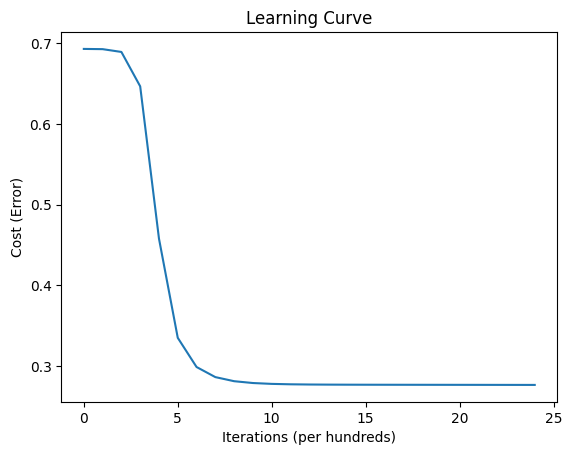

In [98]:
# 1. Initialize a fresh model
# Input size = 16 (features), Hidden size = 10, Output = 1
model = NeuralNetwork(input_size=X.shape[0], hidden_size=10, output_size=1)

# 2. Train the model
print("Starting training...")
costs = model.train(X, Y, iterations=2500, learning_rate=0.5)

# 3. Plot the learning curve
plt.plot(costs)
plt.ylabel('Cost (Error)')
plt.xlabel('Iterations (per hundreds)')
plt.title('Learning Curve')
plt.show()

Training Accuracy: 86.66%


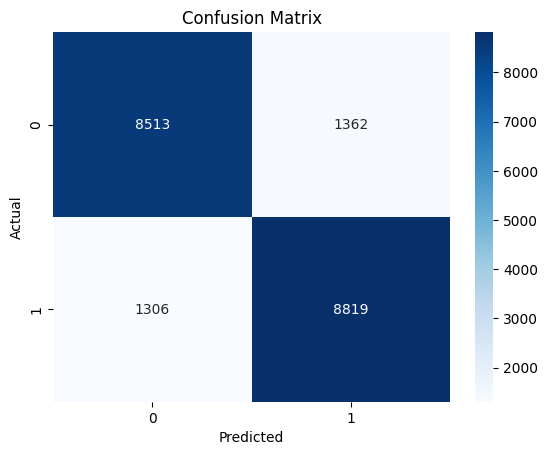

In [101]:
# 1. Get predictions
predictions = model.predict(X)

# 2. Calculate Accuracy
# Compare predictions to the true labels (Y)
# np.mean(predictions == Y) gives the percentage of correct matches
accuracy = np.mean(predictions == Y) * 100

print(f"Training Accuracy: {accuracy:.2f}%")

# Confusion Matrix (to see where it messed up)
cm = confusion_matrix(Y.flatten(), predictions.flatten())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

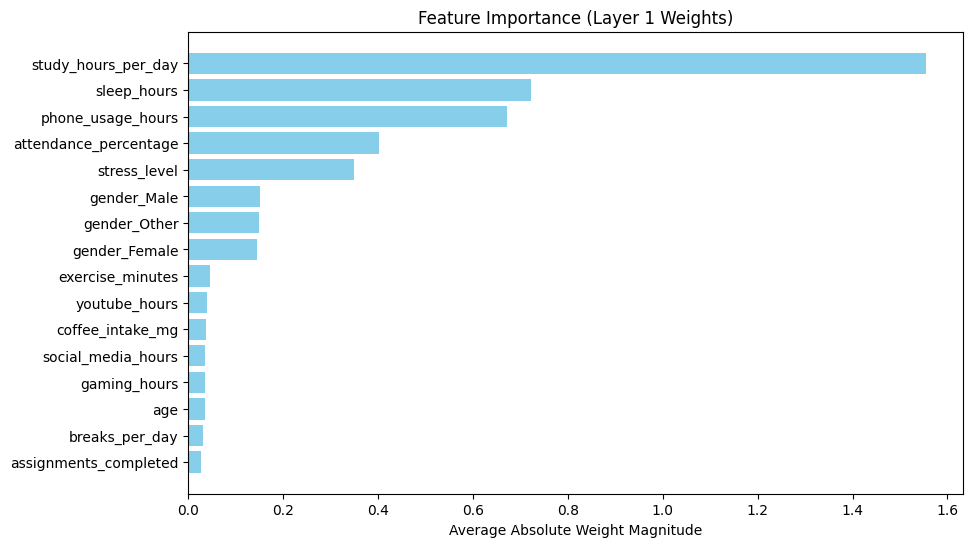

In [102]:
# 1. Retrieve the weights from the first layer
W1 = model.W1  # Shape: (10, 16)

# 2. Calculate the "Importance" of each feature
# We take the absolute value (magnitude) and average it across all 10 hidden neurons
feature_importance = np.mean(np.abs(W1), axis=0)

# 3. Map these scores to your feature names
# We need the column names from your original 'X' (excluding the target)
feature_names = df.drop('is_productive', axis=1).columns.tolist()

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# 4. Sort and Plot
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Average Absolute Weight Magnitude')
plt.title('Feature Importance (Layer 1 Weights)')
plt.gca().invert_yaxis() # Puts the most important feature at the top
plt.show()

### **Optimization Technique**
I used **Batch Gradient Descent**, processing the entire dataset (20,000 records) in each iteration. Since the dataset size fits easily into memory and NumPy’s vectorized operations are highly efficient , the training process was fast enough without needing Mini-batch or Stochastic approximations.

## Part 2: 2-Layer Neural Network Implementation Using a Deep-Learning Framework

### **Task 2.1:**
Assuming you are not familiar with the framework, in this part of the homework you will present your research describing the resources you used to learn the framework (must include links to all resources). Clearly explain why you needed a particular resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of all the computations in a NN i.e., what libraries/tools do you need within this framework.)

*Hint: You need to figure out the APIs/packages used to implement forward propagation and backward propagation*


#### **Research & Resources**
I plan on using **PyTorch** to build the 2-layer NN
- **PyTorch Basics:** [Build the Neural Network](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html) - Used to understand how to subclass `nn.Module` for the 2-layer network
- **Autograd:** [Automatic Differentiation](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html) - Used to understand how `loss.backwards()` computes gradients automatically
- **Optimization:** [Optimizing Model Parameters](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html) - Used to implement the SGD or Adam optimizer

### **Task 2.2:**
Once you have figured out the resources you need for the project, you should design and implement your project. The project must include the following steps (it's not limited to these steps):
1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)
2. Perform a train-dev-test split.
3. Implement forward propagation (clearly describe the activation functions and other hyper-parameters you are using).
4. Compute the final cost function.
5. Implement gradient descent (any variant of gradient descent depending upon your data and project can be used) to train your model. In this step it is up to you as someone in charge of their project to improvise using optimization algorithms (Adams, RMSProp, etc.) and/or regularization. Experiment with normalized inputs i.e. comment on how your model performs when the inputs are normalized.
6. Present the results using the test set.

*NOTE: In this step, once you have implemented your 2-layer network you may increase and/or decrease the number of layers as part of the hyperparameter tuning process.*

In [103]:
# Importing the necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [105]:
"""
Step 1: Data Preparation & Data Split
"""
# 1. Transpose X back to (Samples, Features) for PyTorch
# Current X: (16, 20000) -> New X: (20000, 16)
X_numpy = X.T
Y_numpy = Y.T

# 2. Split Data (Train / Test)
# We use an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X_numpy, Y_numpy, test_size=0.2, random_state=42
)

# 3. Convert to PyTorch Tensors
# PyTorch handles math using "Tensors" (like fancy NumPy arrays)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

print(f"Train Shape: {X_train_tensor.shape}")
print(f"Test Shape: {X_test_tensor.shape}")

Train Shape: torch.Size([16000, 16])
Test Shape: torch.Size([4000, 16])


In [111]:
"""
Step 2: Building the 2-Layer NN
"""
class PyTorchModel(nn.Module):
  """
  PyTorch Implementation of a 2-layer NN.
  """
  def __init__(self, input_size, hidden_size):
      super(PyTorchModel, self).__init__()
      # Layer 1: Input -> Hidden
      self.layer1 = nn.Linear(input_size, hidden_size)
      self.relu = nn.ReLU()

      # Layer 2: Hidden -> Output
      self.layer2 = nn.Linear(hidden_size, 1)
      self.sigmoid = nn.Sigmoid()

  def forward(self, x):
      out = self.layer1(x)
      out = self.relu(out)
      out = self.layer2(out)
      out = self.sigmoid(out)
      return out

In [112]:
# Initialize
input_dim = X_train.shape[1] # Should be 16
hidden_dim = 10              # Same as Part 1
model = PyTorchModel(input_dim, hidden_dim)

print(model)

PyTorchModel(
  (layer1): Linear(in_features=16, out_features=10, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [113]:
"""
Step 3: Training the model
"""
# 1. Define Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy (Same as our 'cost' function)
# We use Adam
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 2. Training Loop
epochs = 1000
costs = []

for epoch in range(epochs):
  # Forward pass
  outputs = model(X_train_tensor)
  loss = criterion(outputs, y_train_tensor)

  # Backward pass and optimization
  optimizer.zero_grad() # Clear previous gradients
  loss.backward()       # Calculate new gradients
  optimizer.step()      # Update weights

  if (epoch+1) % 100 == 0:
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    costs.append(loss.item())

# 3. Evaluate on Test Set
with torch.no_grad(): # Turn off gradient calculation for speed
  test_outputs = model(X_test_tensor)
  predicted = (test_outputs > 0.5).float()
  accuracy = (predicted == y_test_tensor).sum() / y_test_tensor.shape[0]
  print(f"\nTest Accuracy: {accuracy.item() * 100:.2f}%")

Epoch [100/1000], Loss: 0.2866
Epoch [200/1000], Loss: 0.2754
Epoch [300/1000], Loss: 0.2754
Epoch [400/1000], Loss: 0.2754
Epoch [500/1000], Loss: 0.2754
Epoch [600/1000], Loss: 0.2754
Epoch [700/1000], Loss: 0.2754
Epoch [800/1000], Loss: 0.2754
Epoch [900/1000], Loss: 0.2754
Epoch [1000/1000], Loss: 0.2754

Test Accuracy: 86.65%


### **Task 2.3:**
In task 2 describe how you selected the hyperparameters. What was the rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use an optimization algorithm? Why or why not?

#### **Hyperparameters & Rationale:**
For the hidden layer, I chose 10 neurons to maintain consistency with my "from-scratch" implementation in Part 1, allowing for a fair comparison. I switched the activation function to ReLU (instead of Sigmoid) for the hidden layer because it avoids the vanishing gradient problem and generally learns faster, while keeping Sigmoid at the output layer to ensure binary classification predictions .
#### **Optimization Algorithm:**
I used the **Adam optimizer** instead of standard Stochastic Gradient Descent (SGD). Adam adapts the learning rate for each parameter individually using momentum, which allowed the model to converge much faster and more reliably than the fixed learning rate method I used in Part 1.
#### **Regularization:**
I did not implement extra regularization (like Dropout or L2) . My training and test accuracy were nearly identical (~86.6%), indicating that the model was not overfitting. Adding regularization might increase complexity without actually improving the model.